# Data Processing

| Property               | GOAL                                   | `sst.mnmean.nc`                     | `OISSS_L4_multimission_v2.0_1m_201201_202412.nc`   | `mld_dr003_ref10m_v2023.nc`            | `nemo00_1m_201001_202212_grid_T.nc`              | 
|------------------------|----------------------------------------|-------------------------------------|----------------------------------------------------|----------------------------------------|--------------------------------------------------|
| **Content**            | `sst, sss, mld`                        | `sst`                               | `sss`                                              | `mld`                                  | `sst/sbt, sss/sbs, mld (2x), ssh, bs`            |       
| **Resolution**         | `1.0°`                                 | `1.0°`                              | `0.25°`                                            | `1.0°`                                 | `0.5°`                                           |       
| **Mask**               | `Yes (NaN)`                            | `No`                                | `Yes (NaN)`                                        | `Yes (NaN)`                            | `Yes (NaN)`                                      |       
| **Time**               | `monthly climatology`                  | `1981-12-01 to 2023-01-01 (monthly)`| `2012-01-16 to 2024-12-15 (monthly)`               | `monthly climatology`                  | `2010-01-16 to 2022-12-16 (monthly)`             |       
| **Time format**        | `datetime64`                           | `datetime64`                        | `datetime64`                                       | `day of year`                          | `datetime64`                                     |       
| **Dimensions**         | `time`, `lat`, `lon`                   | `time`, `lat`, `lon`                | `time`, `latitude`, `longitude`                    | `time`, `lat`, `lon`                   | `time_counter`, `y`, `x`                         |       
| **Dimension lon/lat**  | `1D`                                   | `1D`                                | `1D`                                               | `1D`                                   | `2D`                                             |       
| **Name time**          | `time`                                 | `time`                              | `time`                                             | `time`                                 | `time_counter`                                   |       
| **Name lon/lat**       | `lon` / `lat`                          | `lon` / `lat`                       | `longitude` / `latitude`                           | `lon` / `lat`                          | `nav_lon` / `nav_lat`                            |       
| **Longitude range**    | `0.50° to 359.50°`  (west to east)     | `0.50° to 359.50°`  (west to east)  | `-179.875° to 179.875°` (west to east)             | `-179.50° to 179.50°` (west to east)   | `-180.00° to 180.00°` (west to east)             |      
| **Latitude range**     | `89.50° to -89.50°` (north to south)   | `89.50° to -89.50°` (north to south)| `-89.875° to 89.875°`   (south to north)           | `-89.50° to 89.50°`   (south to north) | `-77.01° to 89.89°`   (south to north)           |         

## Imports

In [1]:
import xarray as xr
import numpy as np
import regionmask
import os, contextlib
from utils.data.general import fill_coastal_points_in_time

## Data

In [2]:
obs_sst = xr.open_dataset('./obs/sst.mnmean.nc')
obs_sst

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [3]:
obs_sss = xr.open_dataset('./obs/OISSS_L4_multimission_v2.0_1m_201201_202412.nc')
obs_sss

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 156)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2012-01-16 2012-02-15 ... 2024-12-15
Data variables:
    sss        (time, latitude, longitude) float32 ...
Attributes: (12/44)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_v2_monthly
    Version:                       V2.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            180.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east
    history:                       Thu Jun  5 16:29:29 2025: ncks -O -v sss O...
    NCO:                           netCDF Operators version 5.3.3 (Homepage =...

In [4]:
obs_mld = xr.open_dataset('./obs/mld_dr003_ref10m_v2023.nc')
obs_mld

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180, time: 12)
Coordinates:
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time       (time) int32 14 45 73 104 134 165 195 226 257 287 318 348
Data variables:
    mask       (lat, lon) int16 ...
    n_obs      (time, lat, lon) int32 ...
    mld_dr003  (time, lat, lon) float32 ...
Attributes:
    title:        Monthly climatology of the oceanic Mixed Layer Depth (MLD) ...
    institution:  LOPS laboratory (IFREMER, Univ. of Brest, CNRS, IRD), Brest...
    source:       This MLD climatology is generated by monthly mapping (OI/kr...
    references:   DOI of this dataset along with a description: https://doi.o...
    Timestamp:    Wed Jul 12 19:30:42 2023

In [5]:
model = xr.open_dataset('./model/nemo00_1m_201001_202212_grid_T.nc')
model

<xarray.Dataset>
Dimensions:            (time_counter: 156, bnds: 2, y: 510, x: 720)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2010-01-16T12:00:00 ... ...
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
Dimensions without coordinates: bnds, y, x
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] ...
    tos                (time_counter, y, x) float32 ...
    sos                (time_counter, y, x) float32 ...
    zos                (time_counter, y, x) float32 ...
    mldkz5             (time_counter, y, x) float32 ...
    mldr10_1           (time_counter, y, x) float32 ...
    tob                (time_counter, y, x) float32 ...
    sob                (time_counter, y, x) float32 ...
    taubot             (time_counter, y, x) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    name:         nemo00_1d_20100101_20101231_grid_T
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Dec-27 15:07:31 GMT
    uuid:         87d8f670-e44a-4da0-9c1a-a2d24a6b35a7
    history:      Tue May 20 09:44:05 2025: cdo -r monmean nemo00/nemo00_1d_2...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [6]:
mesh = xr.open_dataset('./model/orca05l75_domain_cfg_nemov5_10m.nc')
mesh

<xarray.Dataset>
Dimensions:       (y: 510, x: 720, nav_lev: 75, nlines: 54)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
Dimensions without coordinates: y, x, nlines
Data variables: (12/33)
    e1v           (y, x) float64 ...
    e2u           (y, x) float64 ...
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    glamt         (y, x) float64 ...
    glamu         (y, x) float64 ...
    ...            ...
    e3uw_0        (nav_lev, y, x) float64 ...
    e3vw_0        (nav_lev, y, x) float64 ...
    bottom_level  (y, x) int32 ...
    top_level     (y, x) int32 ...
    bathy_metry   (y, x) float64 ...
    namelist_cfg  (nlines) |S102 ...
Attributes:
    history:      Tue Sep 10 21:54:46 2024: ncap2 -O --ftn -s           /* Gi...
    CfgName:      ORCA
    CfgIndex:     5
    Iperio:       1
    Jperio:       0
    NFold:        1
    NFtype:       F
    VertCoord:    zps
    IsfCav:       0
    NEMOversion:  5.0
    NCO:          netCDF Operators version 5.2.8 (Homepage = http://nco.sf.ne...

## Processing

In [7]:
target_grid = xr.Dataset({
    'lon': (['lon'], np.arange(-179.5, 179.5 + 1)),  
    'lat': (['lat'], np.arange(-89.5, 89.5 + 1))     
})

land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(target_grid)
ocean_mask = land_mask.isnull()

### Obs

#### Extracting relevant data

In [8]:
obs_sst = obs_sst["sst"]
obs_sss = obs_sss["sss"]
obs_mld = obs_mld["mld_dr003"]

#### Compute monthly climatology

In [9]:
obs_sst = obs_sst.groupby('time.month').mean(dim='time')
obs_sss = obs_sss.groupby('time.month').mean(dim='time')

#### Time dimension in months

In [10]:
day_of_year = obs_mld['time'].values  # e.g., [14, 45, ..., 348]
ref_dates = np.array(['2001-01-01'], dtype='datetime64[D]') + day_of_year.astype('timedelta64[D]')
months = xr.DataArray(ref_dates.astype('datetime64[M]').astype(int) % 12 + 1, dims='time', name='month')
obs_mld = obs_mld.assign_coords(month=months).swap_dims({'time': 'month'}).drop_vars('time')

#### Renaming

In [11]:
obs_sss = obs_sss.rename({
    'longitude': 'lon',
    'latitude': 'lat'
})

#### Regridding

In [12]:
import xesmf as xe

obs_sss = fill_coastal_points_in_time(obs_sss, 5, "month") 

with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
    regridder = xe.Regridder(
        obs_sss, target_grid,
        method='bilinear',
        filename='weights_bilinear_sss.nc',  
        reuse_weights=False,                  
        ignore_degenerate=True,
        periodic=True
    )

obs_sss = regridder(obs_sss)

#### Masking

In [13]:
obs_sst = obs_sst.where(ocean_mask)  
obs_sss = obs_sss.where(ocean_mask)  

#### Reordering

In [14]:
for obs in [obs_sst, obs_sss, obs_mld]:
    obs['lon'] = (obs['lon'] + 360) % 360
    obs = obs.sortby('lon') 
    obs = obs.sortby('lat', ascending=False)
    obs = obs.transpose('month', 'lat', 'lon')

#### Combining

In [15]:
combined = xr.merge([
    obs_sst.to_dataset(name="sst"),
    obs_sss.to_dataset(name="sss"),
    obs_mld.to_dataset(name="mld")
])
combined

<xarray.Dataset>
Dimensions:  (lat: 180, month: 12, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    sst      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    sss      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mld      (month, lat, lon) float32 ...

#### Verifying

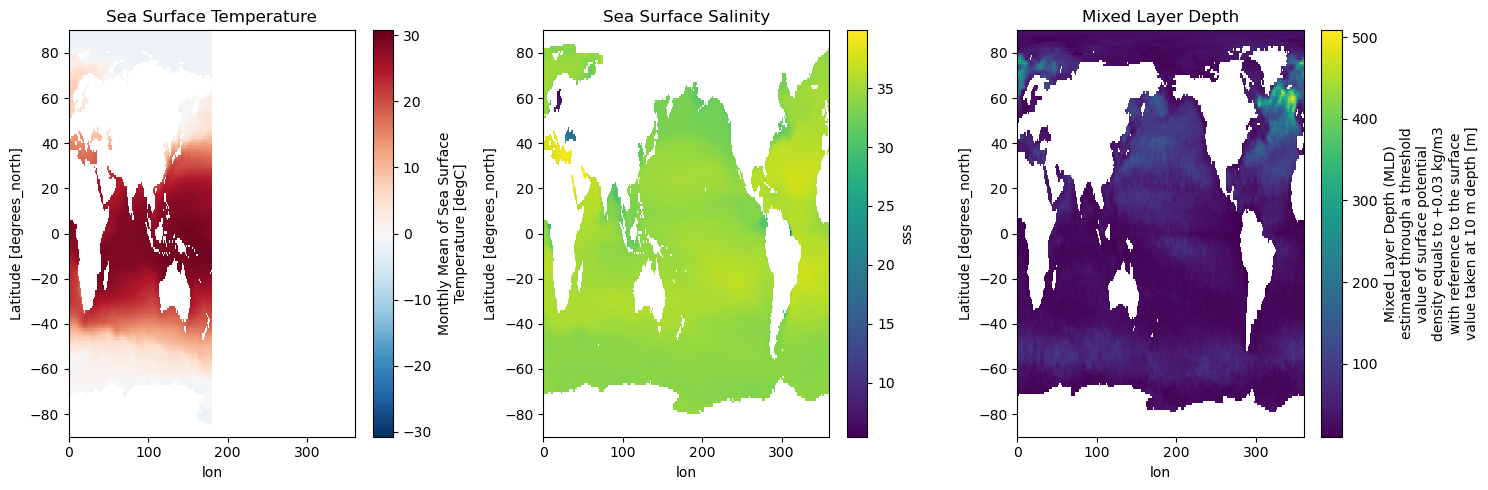

In [16]:
import matplotlib.pyplot as plt

month_to_plot = 1

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
varnames = ['sst', 'sss', 'mld']
titles = ['Sea Surface Temperature', 'Sea Surface Salinity', 'Mixed Layer Depth']

for ax, var, title in zip(axes, varnames, titles):
    data_to_plot = combined[var].sel(month=month_to_plot)
    im = data_to_plot.plot(ax=ax, add_colorbar=True)
    ax.set_title(title)
plt.tight_layout()
plt.show()

#### Saving